In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import linregress

# from autode.autode import *

import time

np.random.seed(12345)

In [2]:
from bamf.bamf import *

# Import sequenced data

## REU 3 community data

In [3]:
t0_data = pd.read_csv("DTL0/REU03_table_t0_20220811.csv")
tf_data = pd.read_csv("DTL0/REU03_table_tf_20220811.csv")

exp_info = ['Treatments', 'Rep', 'Time', 'OD']
inputs = ['Inulin', 'Starch', 'Pectin', 'ArGal', 'Gum', 'AmAc', 'pH']
species = ['BAabs', 'BPabs', 'BTabs', 'BUabs', 'PCabs', 'PJabs',
       'ACabs', 'CGabs', 'CHabs', 'FPabs', 'ERabs', 'BHabs', 'RIabs',
       'CSabs', 'EHabs']

# data with replicates
reps_data = pd.concat((t0_data[exp_info+inputs+species], tf_data[exp_info+inputs+species]))
rep1_data = reps_data.iloc[reps_data['Rep'].values==1].sort_values(by=['Treatments', 'Time'])
rep2_data = reps_data.iloc[reps_data['Rep'].values==2].sort_values(by=['Treatments', 'Time'])

# average replicates
avg_data_3 = rep1_data.copy().drop(['Rep'], axis=1)
avg_data_3[species] = (avg_data_3[species].values + rep2_data[species].values)/2.

# normalize data 
# t0_inds = avg_data_3.Time.values == 0.

# normalize values after initial condition 
# max_od = np.max(avg_data[species].iloc[~t0_inds].values, 0)  
# species_inds = np.in1d(avg_data_3.columns.values, species)
# avg_data.iloc[~t0_inds, species_inds] /= max_od

# set initial conditions 
# avg_data.iloc[t0_inds, species_inds] = np.ceil(avg_data.iloc[t0_inds, species_inds].values) / len(species)

avg_data_3.describe()

,Time,OD,Inulin,Starch,Pectin,ArGal,Gum,AmAc,pH,BAabs,...,PJabs,ACabs,CGabs,CHabs,FPabs,ERabs,BHabs,RIabs,CSabs,EHabs
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,13.185000,0.128130,0.204201,0.204399,0.226223,0.182565,0.182612,0.532609,0.532609,0.008442,...,0.003041,0.003426,0.002600,0.003775,0.000424,0.000484,0.000557,0.000439,0.003674,0.000346
std,13.257247,0.156214,0.263448,0.263543,0.286246,0.236550,0.236580,0.496163,0.496163,0.019056,...,0.004069,0.006862,0.003983,0.005985,0.000263,0.000496,0.000856,0.000244,0.009310,0.000323
min,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000123,...,0.000624,0.000019,0.000066,0.000064,0.000008,0.000023,0.000016,0.000029,0.000115,0.000000
25%,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000667,...,0.000667,0.000667,0.000667,0.000667,0.000154,0.000174,0.000120,0.000194,0.000570,0.000020
50%,13.185000,0.010484,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000667,...,0.000667,0.000667,0.000667,0.000667,0.000622,0.000667,0.000667,0.000606,0.000667,0.000398
75%,26.370000,0.219992,0.333498,0.334486,0.334340,0.333349,0.333326,1.000000,1.000000,0.004769,...,0.003661,0.002460,0.002587,0.004988,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667
max,26.370000,0.537167,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.110081,...,0.023777,0.044670,0.015978,0.027096,0.000667,0.004437,0.007572,0.000667,0.050191,0.000667


## REU 4 community data

In [4]:
t0_data = pd.read_csv("DTL0/REU04_table_t0_20220811.csv")
tf_data = pd.read_csv("DTL0/REU04_table_tf_20220811.csv")

exp_info = ['Treatments', 'Rep', 'Time', 'OD']
inputs = ['Inulin', 'Starch', 'Pectin', 'ArGal', 'Gum', 'AmAc', 'pH']
inputs = []
species = ['BAabs', 'BPabs', 'BTabs', 'BUabs', 'PCabs', 'PJabs',
       'ACabs', 'CGabs', 'CHabs', 'FPabs', 'ERabs', 'BHabs', 'RIabs',
       'CSabs', 'EHabs']
species = list(np.array(species)[np.array([False,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False])])

# data with replicates
reps_data = pd.concat((t0_data[exp_info+inputs+species], tf_data[exp_info+inputs+species]))
rep1_data = reps_data.iloc[reps_data['Rep'].values==1].sort_values(by=['Treatments', 'Time'])
rep2_data = reps_data.iloc[reps_data['Rep'].values==2].sort_values(by=['Treatments', 'Time'])
rep3_data = reps_data.iloc[reps_data['Rep'].values==3].sort_values(by=['Treatments', 'Time'])

# average replicates
avg_data_4 = rep1_data.copy().drop(['Rep'], axis=1)
avg_data_4[species] = (avg_data_4[species].values + rep2_data[species].values + rep3_data[species].values)/3.

## Concatenate REU3 and REU4 data

In [5]:
# concatenate data 
avg_data = avg_data_4.copy() # pd.concat((avg_data_3, avg_data_4))
avg_data

,Treatments,Time,OD,BPabs,BTabs,FPabs,ERabs,BHabs
0,REU04_BH,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000e+00,0.002000
0,REU04_BH,24.004444,0.000567,0.000015,0.000004,0.000000,7.166667e-07,0.002937
5,REU04_BH-BP,0.000000,0.004000,0.002000,0.000000,0.000000,0.000000e+00,0.002000
5,REU04_BH-BP,24.004444,0.003067,0.002659,0.000015,0.000000,0.000000e+00,0.001182
31,REU04_BH-BP-BT,0.000000,0.006000,0.002000,0.002000,0.000000,0.000000e+00,0.002000
...,...,...,...,...,...,...,...,...
3,REU04_ER,24.004444,-0.010030,-0.000003,-0.000002,0.000000,-8.696010e-03,0.000000
30,REU04_ER-FP,0.000000,0.004000,0.000000,0.000000,0.002000,2.000000e-03,0.000000
30,REU04_ER-FP,24.004444,-0.012130,-0.000003,-0.000013,-0.001278,-8.423872e-03,0.000000
4,REU04_FP,0.000000,0.002000,0.000000,0.000000,0.002000,0.000000e+00,0.000000


## REU 3 sum-of-OD data

In [6]:
# import sum of OD data
sum_data_3 = pd.read_csv("DTL0/REU03_table_timeSeriesData_20220811.csv")

# data with replicates
reps_data = sum_data_3[exp_info+inputs].copy()
rep1_data = reps_data.iloc[reps_data['Rep'].values==1].sort_values(by=['Treatments', 'Time'])
rep2_data = reps_data.iloc[reps_data['Rep'].values==2].sort_values(by=['Treatments', 'Time'])

# average replicates
avg_sum_data_3 = rep1_data.copy().drop(['Rep'], axis=1)
avg_sum_data_3.describe()

,Time,OD
count,658.000000,658.000000
mean,13.350218,0.140981
std,8.113530,0.124208
min,0.000000,-0.001833
25%,6.375556,0.042285
50%,13.376944,0.104358
75%,20.378611,0.205290
max,26.379167,0.547167


In [7]:
# # insert initial OD 
# t0_inds = avg_data_3.Time.values == 0.
# avg_sum_data_3[species] = avg_data_3.iloc[t0_inds].values[0,-15:]
# avg_sum_data_3.head()

## REU 4 sum-of-OD data

In [8]:
# import sum of OD data
sum_data_4 = pd.read_csv("DTL0/REU04_table_timeseriesData_processed_20220822.csv")

# data with replicates
reps_data = sum_data_4[exp_info+inputs].copy()
rep1_data = reps_data.iloc[reps_data['Rep'].values==1].sort_values(by=['Treatments', 'Time'])
rep2_data = reps_data.iloc[reps_data['Rep'].values==2].sort_values(by=['Treatments', 'Time'])
rep3_data = reps_data.iloc[reps_data['Rep'].values==3].sort_values(by=['Treatments', 'Time'])

# average replicates
avg_sum_data_4 = rep1_data.copy().drop(['Rep'], axis=1)
avg_sum_data_4['OD'] = (avg_sum_data_4['OD'].values + rep2_data['OD'].values + rep3_data['OD'].values)/3.

# insert initial conditions to sum of OD data 
initial_conditions = np.zeros([avg_sum_data_4.values.shape[0], len(species)])
all_treatments = avg_sum_data_4['Treatments'].values
unique_treatments = np.unique(all_treatments)
k = 0
for treatment in unique_treatments:
    inds = np.in1d(all_treatments, treatment)
    sum_data = avg_sum_data_4.iloc[inds].copy()
    n_time = sum_data.values.shape[0]
    
    # get initial condition from community data
    inds = np.in1d(avg_data.Treatments.values, treatment)
    initial_condition = avg_data.iloc[inds].copy()[species].values[0]
    
    # store initial condition
    initial_conditions[k:k+n_time] = initial_condition    
    k += n_time

# store initial conditions in dataframe 
avg_sum_data_4[species] = initial_conditions

# print df 
avg_sum_data_4.head()

,Treatments,Time,OD,BPabs,BTabs,FPabs,ERabs,BHabs
0,REU04_BH,0.000000,0.010400,0.0,0.0,0.0,0.0,0.002
1,REU04_BH,2.000278,0.011332,0.0,0.0,0.0,0.0,0.002
2,REU04_BH,4.000278,0.008498,0.0,0.0,0.0,0.0,0.002
3,REU04_BH,6.000833,0.008793,0.0,0.0,0.0,0.0,0.002
4,REU04_BH,8.001111,0.011464,0.0,0.0,0.0,0.0,0.002


## Concatenate sum of OD data

In [9]:
avg_sum_data = avg_sum_data_4.copy() #pd.concat((avg_sum_data_3, avg_sum_data_4))
avg_sum_data.head()

,Treatments,Time,OD,BPabs,BTabs,FPabs,ERabs,BHabs
0,REU04_BH,0.000000,0.010400,0.0,0.0,0.0,0.0,0.002
1,REU04_BH,2.000278,0.011332,0.0,0.0,0.0,0.0,0.002
2,REU04_BH,4.000278,0.008498,0.0,0.0,0.0,0.0,0.002
3,REU04_BH,6.000833,0.008793,0.0,0.0,0.0,0.0,0.002
4,REU04_BH,8.001111,0.011464,0.0,0.0,0.0,0.0,0.002


# Scale low-fidelity OD measurements to match high-fidelity data

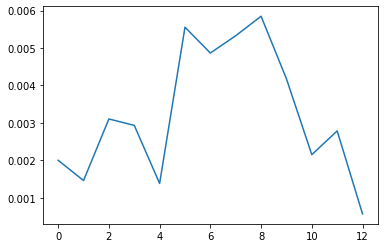

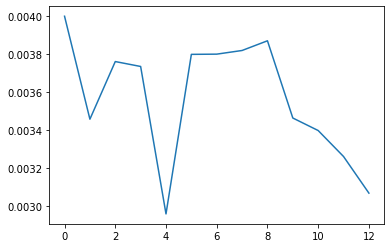

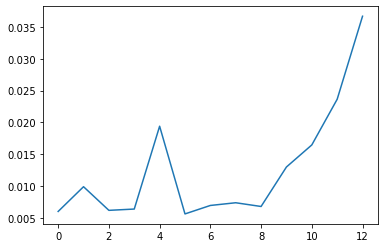

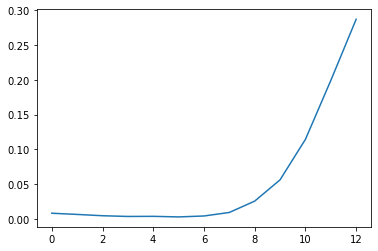

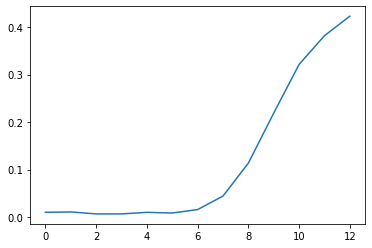

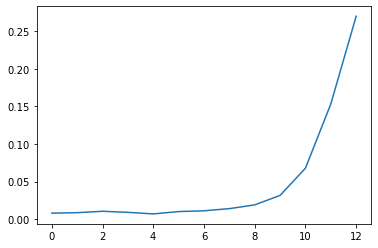

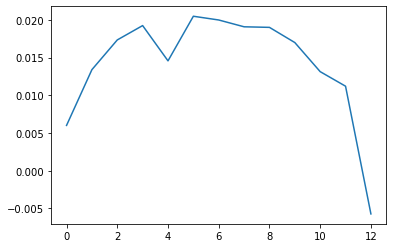

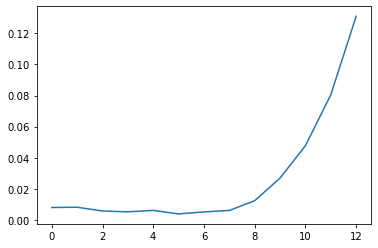

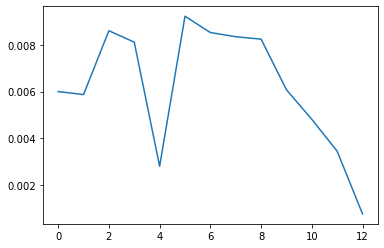

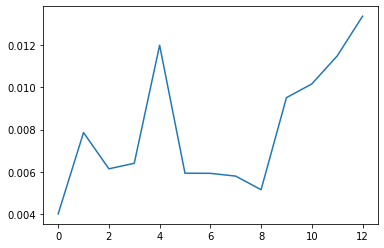

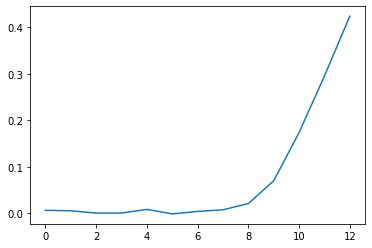

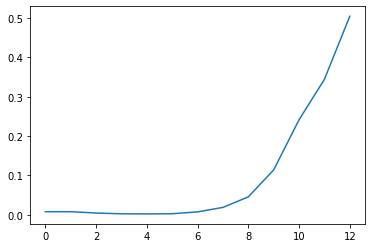

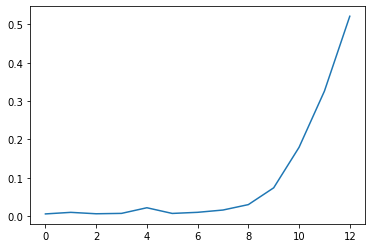

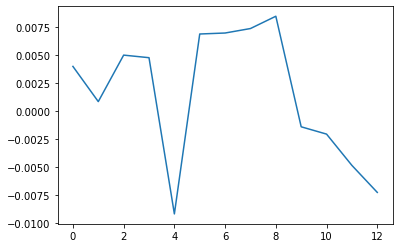

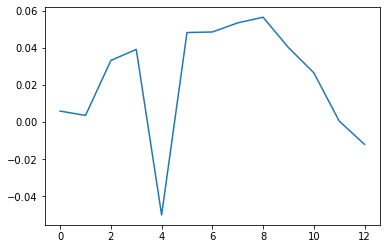

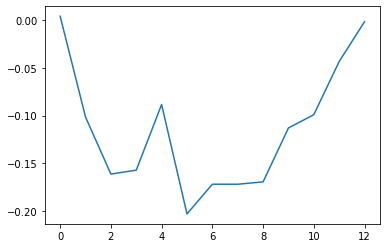

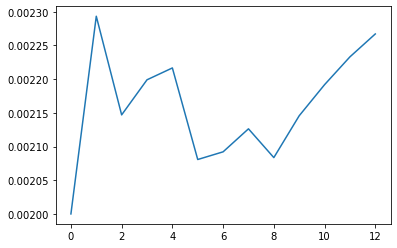

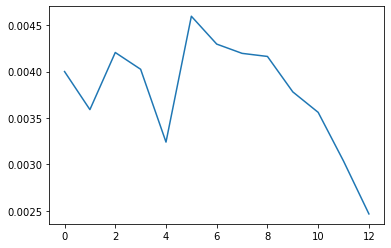

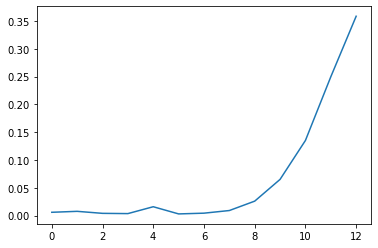

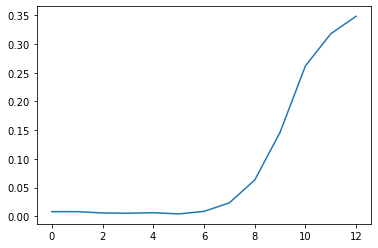

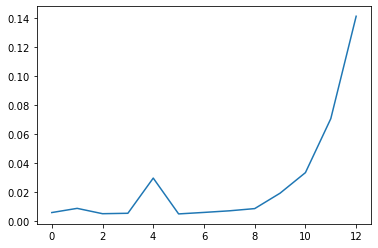

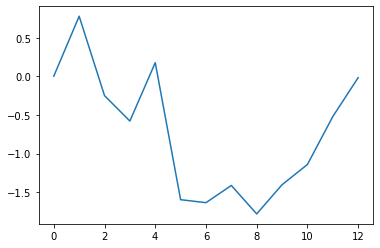

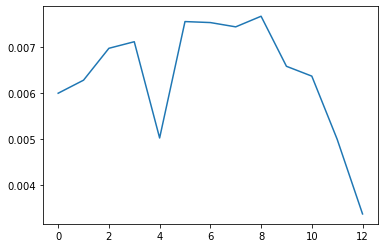

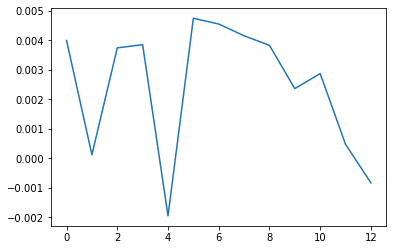

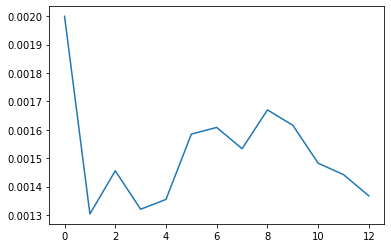

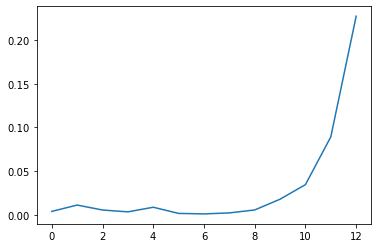

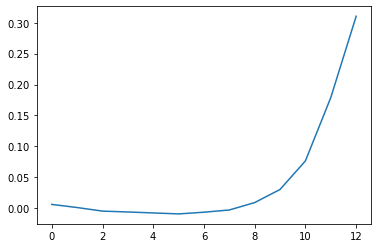

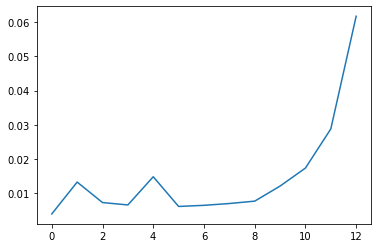

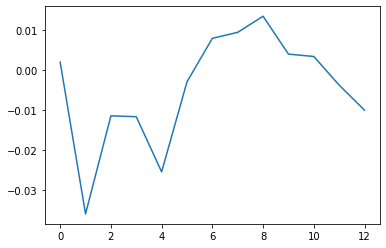

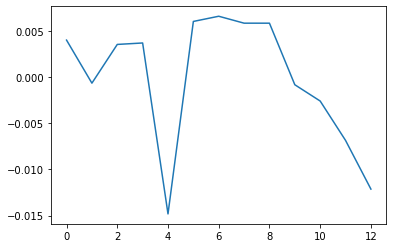

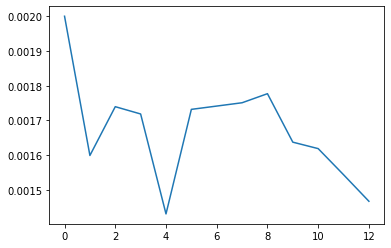

In [10]:
all_treatments = avg_data.Treatments.values
unique_treatments = np.unique(all_treatments)

for treatment in unique_treatments:
    # pull out sum of comm data
    sum_inds  = np.in1d(avg_sum_data.Treatments.values, treatment)
    avg_sum_data_comm = avg_sum_data.iloc[sum_inds].copy()
    
    # pull out comm data
    all_inds  = np.in1d(avg_data.Treatments.values, treatment)
    avg_data_comm = avg_data.iloc[all_inds].copy()
        
    # get initial and final OD of comm data
    OD_t0 = avg_data_comm['OD'].values[0]
    OD_tf = avg_data_comm['OD'].values[1]
    
    ### scale total OD so that it matches initial and final OD measurements of comm OD ###
    
    # measurement of total OD
    OD_total = avg_sum_data_comm['OD'].values 
    
    # set so that initial value is zero 
    d = OD_total - OD_total[0]
    
    # scaling factor needed to make final total OD = final comm OD
    x = (OD_tf - OD_t0)/d[-1]

    # compute scaled total OD
    OD_scaled = x*d + OD_t0
    
    # plot scaled total OD
    plt.plot(OD_scaled)
    plt.show()
    
    od_inds = np.in1d(avg_sum_data.columns.values, 'OD')
    avg_sum_data.iloc[sum_inds, od_inds] = OD_scaled

# Set negative OD measurements to zero

In [11]:
avg_sum_data['OD'] = np.clip(avg_sum_data['OD'].values, 0, np.inf)

avg_data['OD'] = np.clip(avg_data['OD'].values, 0, np.inf)
avg_data[species]  = np.clip(avg_data[species].values, 0, np.inf)

# Define function to make predictions on test data

In [12]:
# Define function to make predictions on test data

def test_model(model, df_test, species, plot=False):
    all_treatments = df_test.Treatments.values
    unique_treatments = np.unique(all_treatments)
    numspecies = len(species)

    # save true and predicted values
    y_true = []
    y_pred = []
    y_std  = []
    test_treatments = []
    test_times = []
    all_species_names = []

    # pull a random community trajectory
    for treatment in unique_treatments:
        comm_inds = np.in1d(df_test['Treatments'].values, treatment)
        comm_data = df_test.iloc[comm_inds].copy()

        # make sure comm_data is sorted in chronological order
        comm_data.sort_values(by='Time', ascending=True, inplace=True)
        tspan = comm_data.Time.values

        # pull just the community data
        output_true = comm_data[species].values

        # run model using parameters
        x_test = np.copy(output_true[0, :])
        
        # control parameters 
        ctrl_params = comm_data[inputs].values #[0]
        print(ctrl_params)

        # test full community
        output, stdv, COV = model.predict(x_test, tspan, ctrl_params=ctrl_params)

        # save predictions after initial value 
        for i, (true, pred, std) in enumerate(zip(output_true[1:], output[1:], stdv[1:])):
            y_true += list(true)
            y_pred += list(pred)
            y_std  += list(std)
            test_times += [tspan[i+1]]*numspecies
            all_species_names += list(species)
            test_treatments += [treatment]*numspecies

        if plot:
            # increase teval
            t_eval = np.linspace(0, tspan[-1]+2)
            steps = len(t_eval)
            output, stdv, COV = model.predict(x_test, t_eval, ctrl_params=ctrl_params)   

            # plot the results
            plt.figure(figsize=(9, 6))
            ylim = 0
            for i in range(numspecies):
                out = output[:,i]
                out_true = output_true[:, i]
                std = stdv[:, i]
                if ylim < np.max([np.max(out) + np.max(std)+.1, np.max(out_true)+.1]):
                    ylim = np.max([np.max(out) + np.max(std)+.1, np.max(out_true)+.1])
                if out[0] > 0:
                    plt.scatter(tspan, out_true, color='C{}'.format(i))
                    plt.plot(t_eval, out, label=f"Predicted {species[i]}", color='C{}'.format(i))
                    plt.fill_between(t_eval, out-std, out+std, color='C{}'.format(i), alpha=0.2)

            plt.xlabel("time", fontsize=16)
            plt.ylabel("Abundance", fontsize=16)
            plt.legend(loc='upper left')
            #plt.ylim([0, np.min([ylim, 3])])
            plt.title(f"Treatment {treatment} predictions")
            #plt.savefig("Kfold/Figures/{}_{}.pdf".format(dataset.replace("_",""), treatment.replace("<","")))
            #plt.close()
            plt.show()

    return test_treatments, test_times, all_species_names, y_true, y_pred, y_std

# Initialize model parameters

In [13]:
# # system dimensions
# ns = len(species)
# nu = len(inputs)
# nx = ns + nu

# # hidden dimension
# nh = 32

# # map to hidden dimension
# stdv = 1./np.sqrt(nh*nx)
# A = np.random.uniform(0, stdv, [nh, nx])

# # init bias term
# a = np.random.uniform(0, stdv, nh)

# # map back to original dimension
# stdv = 1./np.sqrt(ns*nh)
# B = np.random.uniform(-stdv, 0, [ns, nh])

# # init growth rates
# b = np.random.uniform(0, stdv, ns)

# # init carrying capacities 
# t0_inds = avg_data.Time.values == 0.
# c = 1./np.max(avg_data[species].values, 0)

# # concatenate parameters 
# params = np.concatenate((A.flatten(), a, B.flatten(), b))
# prior  = np.zeros_like(params)
# prior[-ns:] = c

# # using NODE model 
# def system(t, s, params, ctrl_params): 

#     # append species to ctrl params
#     # x = jnp.concatenate((s, ctrl_params[0]))
    
#     # map to hidden dimension
#     A = jnp.reshape(params[:nh*nx], [nh,nx])
#     a = params[nh*nx:nh*nx+nh]

#     # map back to original dimension
#     B = jnp.reshape(params[nh*nx+nh:nh*nx+nh+nh*ns], [ns,nh])
#     b = params[nh*nx+nh+nh*ns:nh*nx+nh+nh*ns+ns]

#     # carrying capacity
#     c = params[-ns:]
    
#     # compute hidden dimension
#     h = jnp.tanh(A@s + a)

#     # rate of change of species 
#     dsdt = s * (B@h + b) * (1. - c*s)

#     return dsdt

# # count parameters 
# n_params = len(params)
# n_params

In [14]:
# system dimensions
ns = len(species)
nu = len(inputs)
nx = ns + nu

# hidden dimension
nh = 16

# map to hidden dimension
stdv = 1./np.sqrt(nh*nx)
A1 = np.random.uniform(0, stdv, [nh, nx])

# init bias term
a1 = np.random.uniform(0, stdv, nh)

# map to hidden dimension
stdv = 1./np.sqrt(nh*nh)
A2 = np.random.uniform(0, stdv, [nh, nh])

# init bias term
a2 = np.random.uniform(0, stdv, nh)

# map back to original dimension
stdv = 1./np.sqrt(ns*nh)
B = np.random.uniform(-stdv, 0, [ns, nh])

# init growth rates
b = np.random.uniform(0, stdv, ns)

# init carrying capacities 
t0_inds = avg_data.Time.values == 0.
c = 1./np.max(avg_data[species].values, 0)

# concatenate parameters 
params = np.concatenate((A1.flatten(), a1, A2.flatten(), a2, B.flatten(), b, c))
prior  = np.zeros_like(params)
prior[-ns:] = c

# using NODE model 
def system(t, s, params, ctrl_params): 

    # append species to ctrl params
    # x = jnp.concatenate((s, ctrl_params[0]-.5))
    
    # map to hidden dimension
    A1 = jnp.reshape(params[:nh*nx], [nh,nx])
    a1 = params[nh*nx:nh*nx+nh]
    
    # map to hidden dimension
    A2 = jnp.reshape(params[nh*nx+nh:nh*nx+nh+nh**2], [nh,nh])
    a2 = params[nh*nx+nh+nh**2:nh*nx+nh+nh**2+nh]

    # map back to original dimension
    B = jnp.reshape(params[nh*nx+nh+nh**2+nh:nh*nx+nh+nh**2+nh+nh*ns], [ns,nh])
    b = params[nh*nx+nh+nh**2+nh+nh*ns:nh*nx+nh+nh**2+nh+nh*ns+ns]

    # carrying capacity
    c = params[-ns:]
    
    # compute hidden dimension
    h1 = jnp.tanh(A1@s + a1)
    h2 = jnp.tanh(A2@h1 + a2)

    # rate of change of species 
    dsdt = s * (B@h2 + b) * (1. - c*s)

    return dsdt

# count parameters 
n_params = len(params)
n_params

458

In [15]:
# # system dimensions
# ns = len(species)
# nu = len(inputs)
# nx = ns + nu

# # interaction matrix
# stdv = 1./np.sqrt(ns*nx)
# A = np.random.uniform(0, -stdv, [ns, nx])

# # init bias term
# a = np.random.uniform(0, stdv, ns)

# # init carrying capacities 
# t0_inds = avg_data.Time.values == 0.
# c = 1./np.max(avg_data[species].values, 0)

# # concatenate parameters 
# params = np.concatenate((A.flatten(), a, c))
# prior  = np.zeros_like(params)
# prior[-ns:] = c

# # using NODE model 
# def system(t, s, params, ctrl_params): 

#     # append species to ctrl params
#     x = jnp.concatenate((s, ctrl_params[0]-.5))
    
#     # map to hidden dimension
#     A = jnp.reshape(params[:ns*nx], [ns,nx])
#     a = params[ns*nx:ns*nx+ns]

#     # carrying capacity
#     c = params[-ns:]

#     # rate of change of species 
#     dsdt = s * (A@x + a) * (1. - c*s)

#     return dsdt

# # count parameters 
# n_params = len(params)
# n_params

# Define compression functions

In [16]:
# define compression functions 
compressor0 = lambda x: jnp.expand_dims(jnp.sum(x), 0)     # sum over outputs 
compressor1 = lambda x: x

compressors = [compressor0, compressor1]

## Define ODE (time, x, parameters, u(t), control parameters)

In [17]:
# instantiate gLV fit 
model = ODE(system = system, 
            dataframes=[avg_sum_data, avg_data],
            compressors = compressors,
            params = params, 
            prior = prior,
            sys_vars = species,
            measured_vars = [['OD'], species],
            controls = inputs,
            verbose=True)

'''model = ODE(system = system, 
            dataframes=[avg_data],
            compressors = [compressor1],
            params = params, 
            prior = prior,
            sys_vars = species,
            measured_vars = [species],
            controls = inputs,
            verbose=True)'''

# fit to data 
t0 = time.time()
model.fit(evidence_tol=1e-3, beta_tol=1e-5)
print("Elapsed time {:.2f}s".format(time.time()-t0))

Updating precision...
Total samples: 97, Updated regularization: 1.16e-02
Total weighted fitting error: 60.803
Total weighted fitting error: 50.892
Total weighted fitting error: 49.850
Total weighted fitting error: 49.426
Total weighted fitting error: 49.258
Total weighted fitting error: 47.543
Total weighted fitting error: 47.463
Total weighted fitting error: 47.438
Total weighted fitting error: 47.302
Total weighted fitting error: 47.248
Total weighted fitting error: 47.228
Total weighted fitting error: 46.982
Total weighted fitting error: 46.949
Total weighted fitting error: 46.941
Total weighted fitting error: 46.925
Total weighted fitting error: 46.897
Total weighted fitting error: 46.894
Total weighted fitting error: 46.887
Total weighted fitting error: 46.875
Total weighted fitting error: 46.861
Total weighted fitting error: 46.859
     fun: 46.85850968262675
     jac: array([ 7.33729126e-03, -2.55015711e-05,  7.38787465e-04,  6.87341439e-04,
        2.80859112e-03,  5.64961974e

Evidence 500.409
Updating precision...
Total samples: 97, Updated regularization: 7.02e-03
Total weighted fitting error: 68.050
Total weighted fitting error: 67.833
Total weighted fitting error: 67.808
Total weighted fitting error: 67.760
Total weighted fitting error: 67.730
     fun: 67.7295043403261
     jac: array([ 6.21639052e-03, -9.22123611e-04,  5.09202597e-04,  3.90026951e-04,
        2.18013790e-03,  4.77608619e-03,  1.37046864e-03,  2.45423708e-03,
        2.66596116e-03,  2.53098225e-03,  5.56519162e-03,  1.74438301e-03,
       -2.16412445e-04,  1.93816286e-05,  1.06168038e-03,  4.40981239e-03,
        2.19869590e-03,  3.42604611e-03,  3.68664810e-03,  2.87330220e-03,
        5.47845848e-03,  8.72929813e-04,  1.64967531e-03,  8.74475634e-04,
        1.62636722e-03,  5.63716376e-03,  1.88736233e-03,  2.52316194e-03,
        2.78894952e-03,  5.26463147e-04,  2.79625505e-03,  5.64686998e-05,
        3.44780996e-03, -4.14543989e-04,  1.83540385e-03,  4.67095245e-03,
        1.13

Evidence 517.729
Updating precision...
Total samples: 97, Updated regularization: 7.12e-03
Total weighted fitting error: 68.765
Total weighted fitting error: 68.677
Total weighted fitting error: 68.657
     fun: 68.65668224717501
     jac: array([ 6.00338588e-03, -1.33233564e-03,  4.21887060e-04,  2.48211931e-04,
        2.00359733e-03,  4.60981112e-03,  9.38039972e-04,  2.25163298e-03,
        2.40361644e-03,  2.33938405e-03,  5.35790157e-03,  1.26795669e-03,
       -2.44580035e-04, -7.36056754e-05,  9.65964224e-04,  4.28429991e-03,
        1.64670416e-03,  3.15289455e-03,  3.34300986e-03,  2.65541719e-03,
        5.29260095e-03,  4.14724636e-04,  1.49293884e-03,  7.14738213e-04,
        1.49043999e-03,  5.45634981e-03,  1.31364027e-03,  2.30372464e-03,
        2.49165227e-03,  4.60891519e-04,  2.76220660e-03, -2.97339051e-04,
        3.17786471e-03, -4.75216366e-04,  1.68933836e-03,  4.53104312e-03,
        6.71629445e-04, -7.44775680e-05,  2.95624533e-03,  2.63510784e-03,
        5.

Evidence 517.187
Updating precision...
Total samples: 97, Updated regularization: 7.21e-03
Total weighted fitting error: 68.463
Total weighted fitting error: 68.434
     fun: 68.43386052298243
     jac: array([ 6.00978918e-03, -1.71218999e-03,  3.36937606e-04,  8.43860689e-05,
        1.85154367e-03,  4.60595498e-03,  5.40209585e-04,  2.07146560e-03,
        2.14815559e-03,  2.17495859e-03,  5.32446476e-03,  8.48305121e-04,
       -2.75738159e-04, -1.84231933e-04,  8.83754401e-04,  4.33811173e-03,
        1.15117733e-03,  2.91198120e-03,  3.01451492e-03,  2.46860995e-03,
        5.29505080e-03,  8.58996646e-06,  1.35190308e-03,  5.43734001e-04,
        1.37397763e-03,  5.48181497e-03,  8.02220136e-04,  2.10801139e-03,
        2.19915202e-03,  4.03462676e-04,  2.87424424e-03, -6.09182054e-04,
        2.94209155e-03, -5.57367632e-04,  1.56454497e-03,  4.56076814e-03,
        2.66800547e-04, -1.18282980e-04,  2.65680254e-03,  2.45092763e-03,
        5.87302074e-03, -1.21494313e-03,  2.588

Evidence 516.454
Updating precision...
Total samples: 97, Updated regularization: 7.24e-03
Total weighted fitting error: 68.239
Total weighted fitting error: 68.210
Total weighted fitting error: 68.109
Total weighted fitting error: 68.090
     fun: 68.08967337366369
     jac: array([ 6.00707950e-03, -2.39803968e-03,  1.93047992e-04, -1.98749345e-04,
        1.62715674e-03,  4.60195355e-03, -1.56943162e-04,  1.79242145e-03,
        1.73829368e-03,  1.93235208e-03,  5.25495643e-03,  1.41569646e-04,
       -3.35541903e-04, -3.76461598e-04,  7.62292417e-04,  4.42616455e-03,
        2.77160696e-04,  2.54042167e-03,  2.48915632e-03,  2.19203113e-03,
        5.27400477e-03, -6.87319378e-04,  1.13104843e-03,  2.60861067e-04,
        1.20264490e-03,  5.50811132e-03, -8.37826519e-05,  1.80307333e-03,
        1.72896637e-03,  3.16114019e-04,  3.01222224e-03, -1.14998955e-03,
        2.58628791e-03, -7.05034705e-04,  1.38169469e-03,  4.58685355e-03,
       -4.29296109e-04, -1.97974136e-04,  2.1867

Evidence 515.652
Updating precision...
Total samples: 97, Updated regularization: 7.28e-03
Total weighted fitting error: 67.965
Total weighted fitting error: 67.952
     fun: 67.95180943157106
     jac: array([ 5.9604761e-03, -2.7221846e-03,  1.3116204e-04, -3.1282345e-04,
        1.5340503e-03,  4.5719729e-03, -4.8766588e-04,  1.6733132e-03,
        1.5672344e-03,  1.8308844e-03,  5.1895445e-03, -1.8423254e-04,
       -3.6179749e-04, -4.5314117e-04,  7.1202335e-04,  4.4335672e-03,
       -1.3854605e-04,  2.3815474e-03,  2.2681986e-03,  2.0760093e-03,
        5.2238950e-03, -1.0099653e-03,  1.0376208e-03,  1.4724168e-04,
        1.1317052e-03,  5.4792799e-03, -5.0000369e-04,  1.6730413e-03,
        1.5343986e-03,  2.7967538e-04,  3.0330615e-03, -1.4022503e-03,
        2.4368747e-03, -7.6230621e-04,  1.3059452e-03,  4.5614266e-03,
       -7.5501006e-04, -2.3299501e-04,  1.9933537e-03,  2.0683517e-03,
        5.7843858e-03, -2.1743232e-03,  2.0981175e-03, -6.1928079e-04,
        4.275956

Evidence 515.491
Elapsed time 60.40s


[]


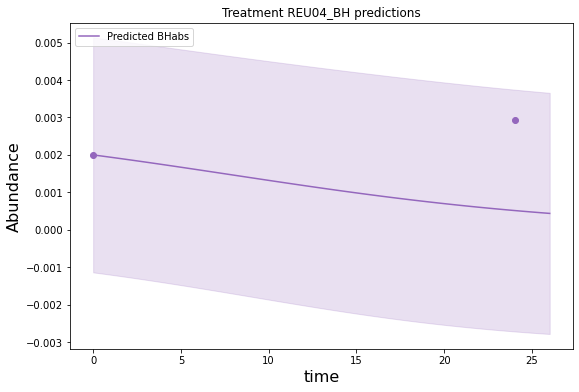

[]


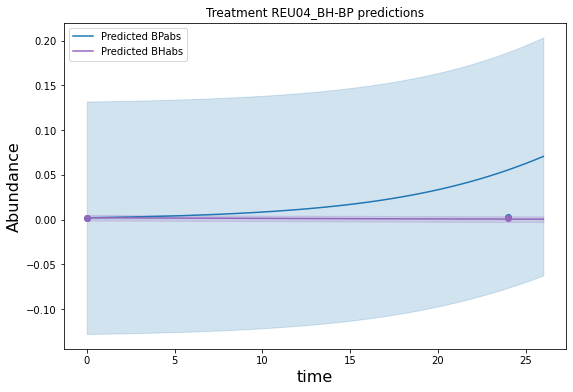

[]


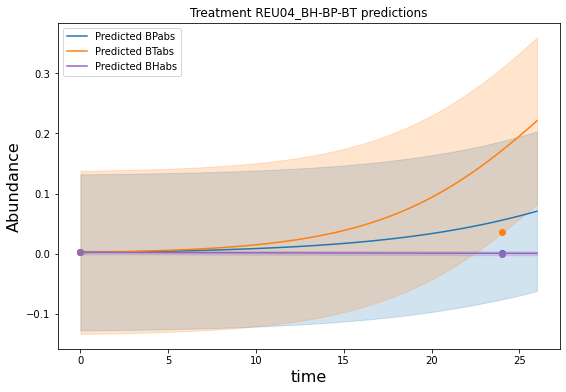

[]


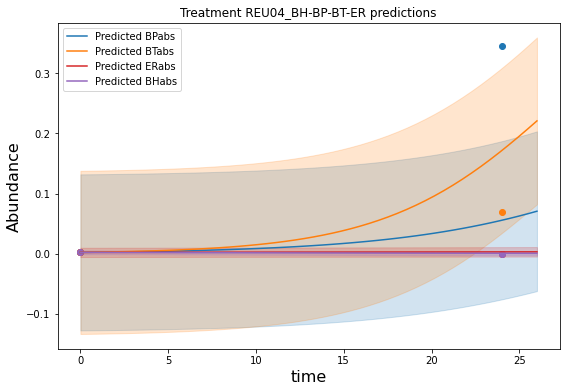

[]


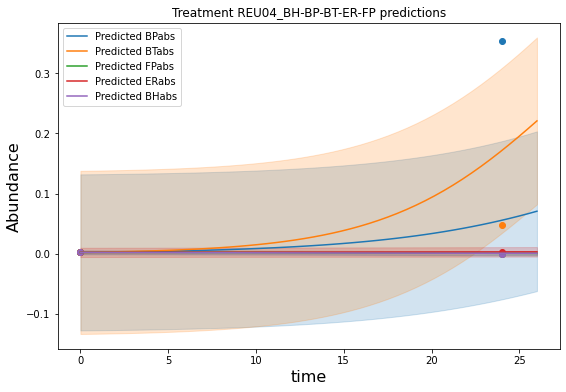

[]


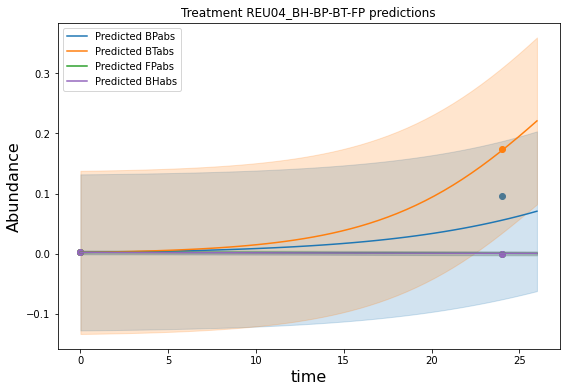

[]


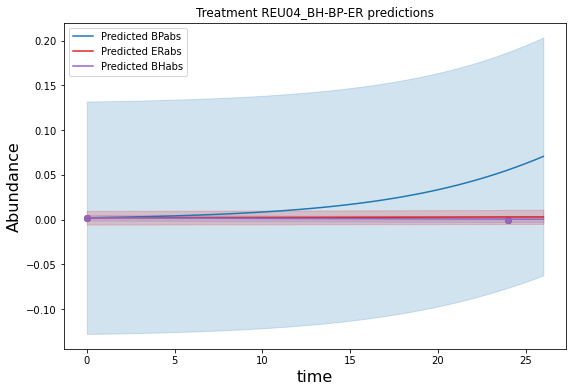

[]


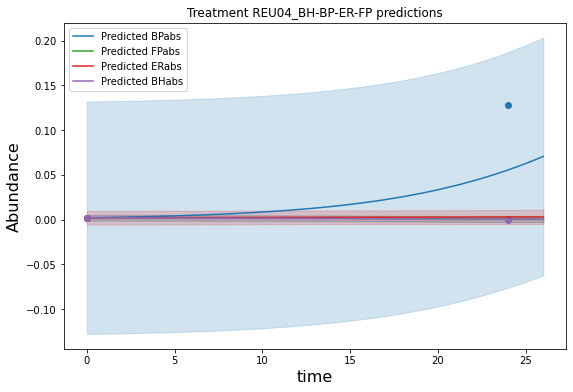

[]


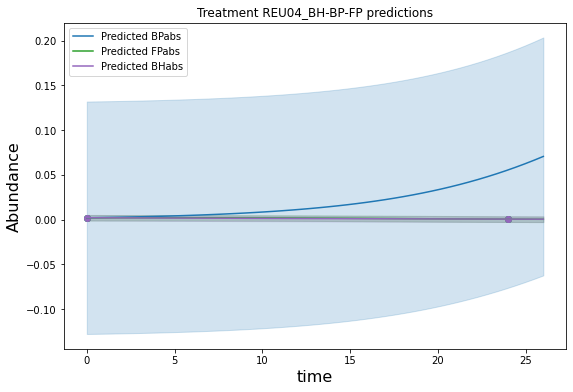

[]


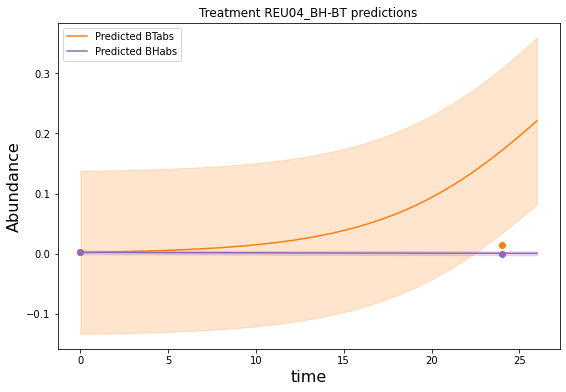

[]


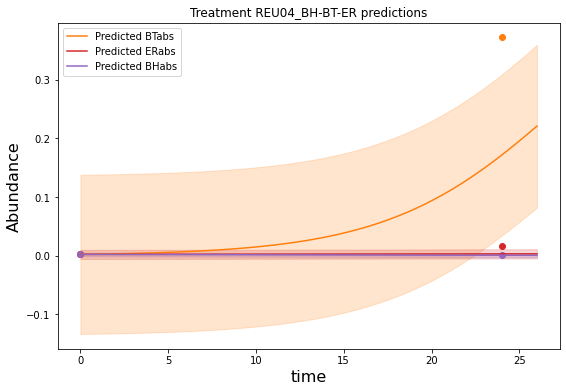

[]


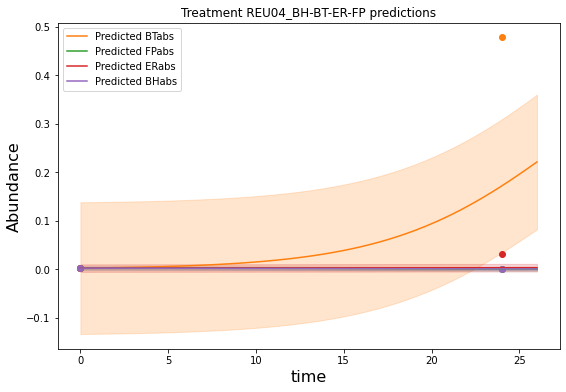

[]


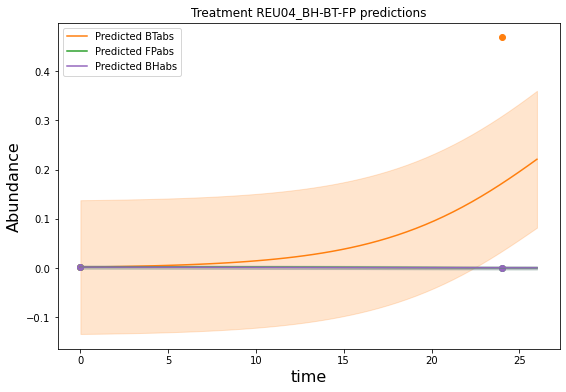

[]


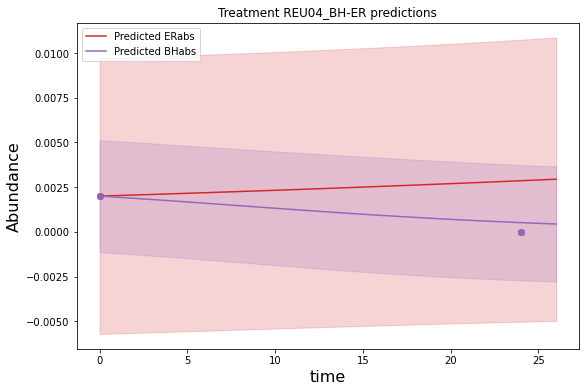

[]


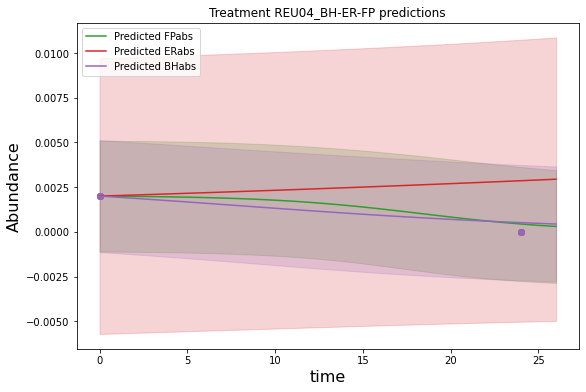

[]


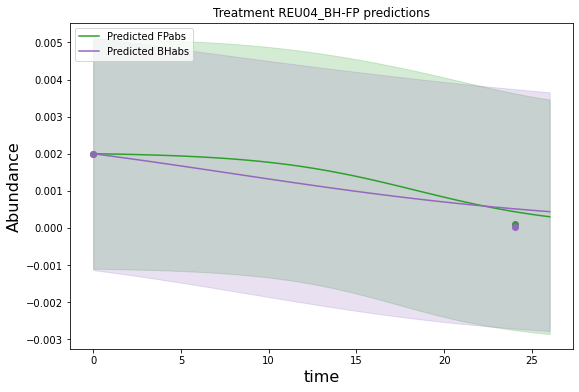

[]


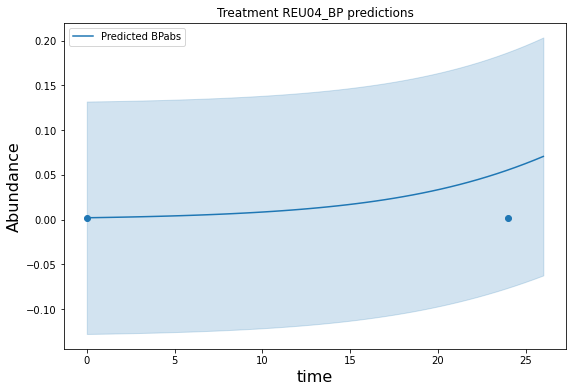

[]


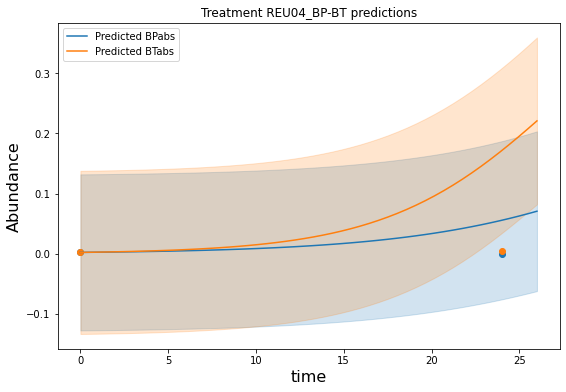

[]


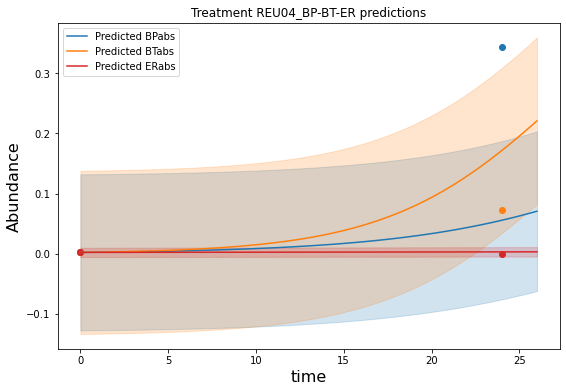

[]


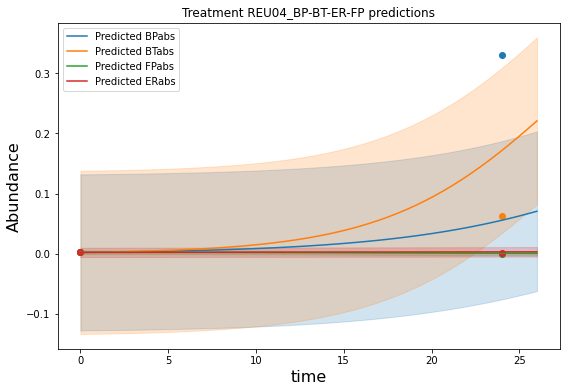

[]


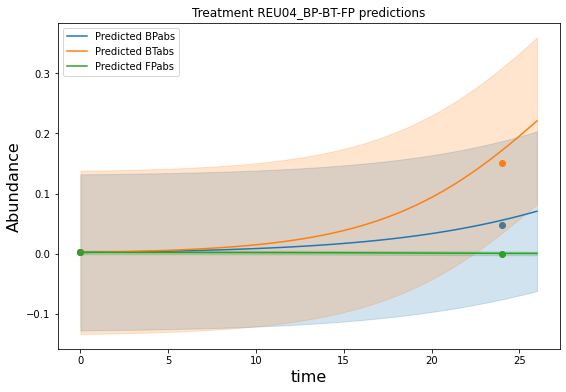

[]


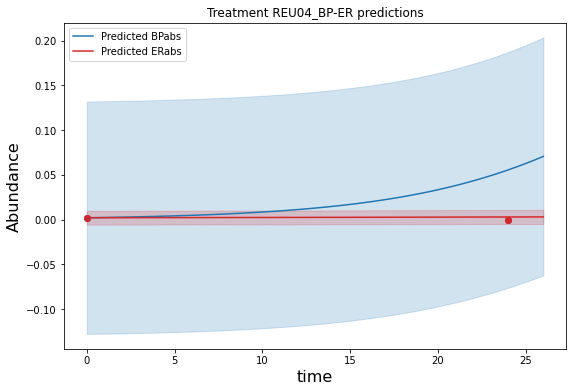

[]


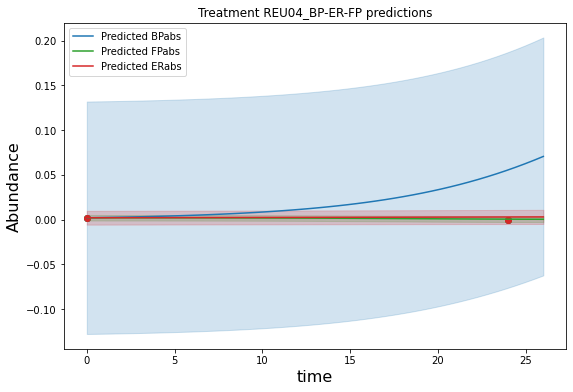

[]


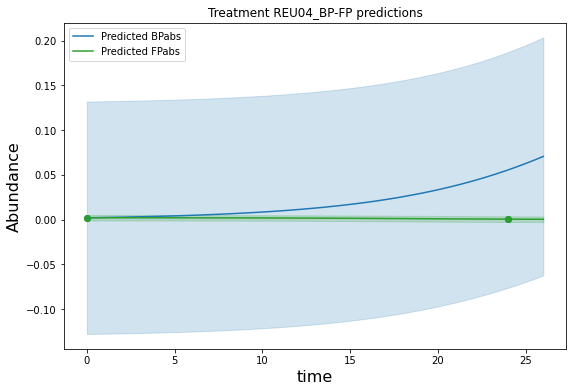

[]


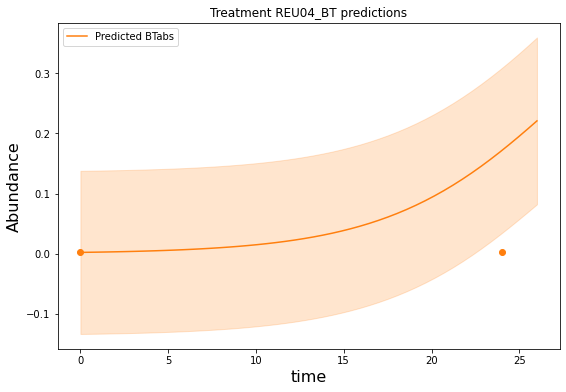

[]


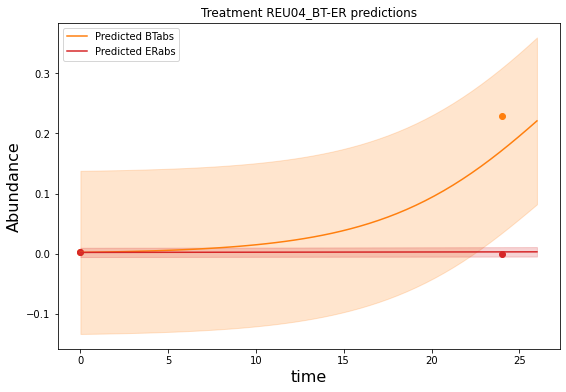

[]


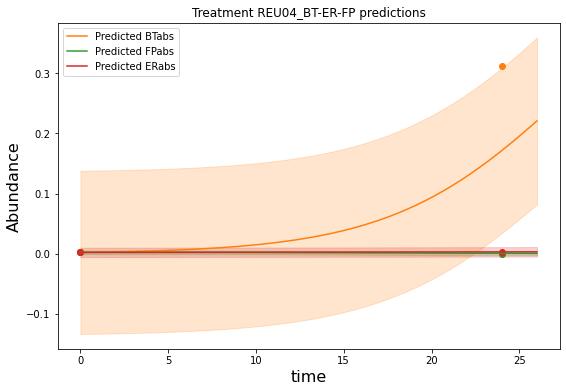

[]


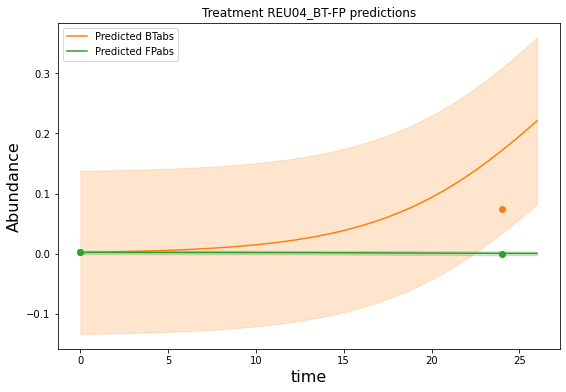

[]


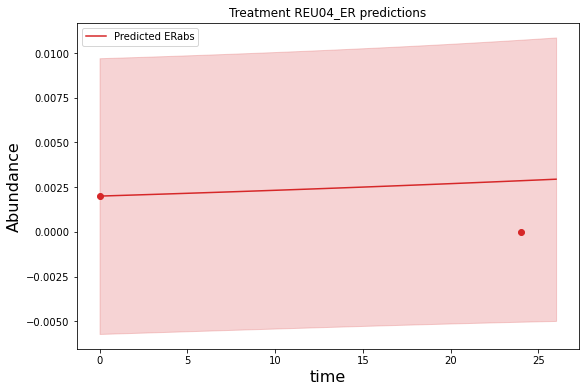

[]


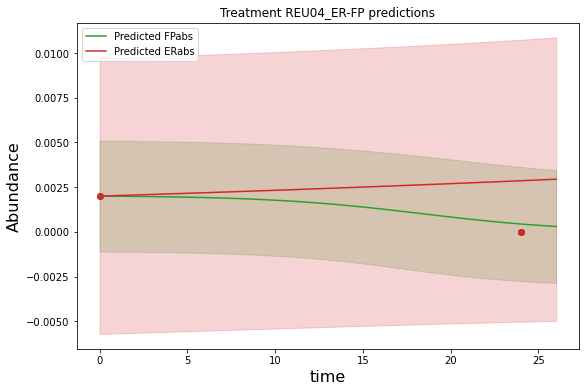

[]


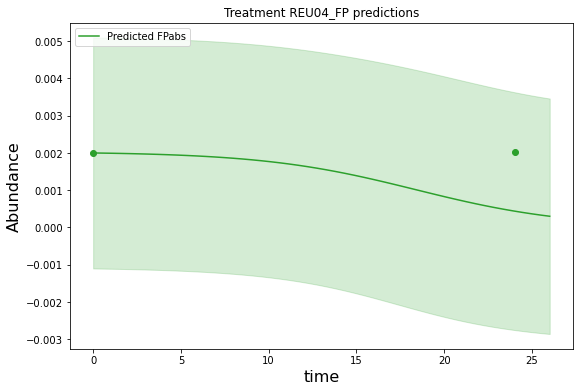

In [18]:
test_treatments, test_times, all_species_names, y_true, y_pred, y_std = test_model(model, avg_data, species, plot=True)

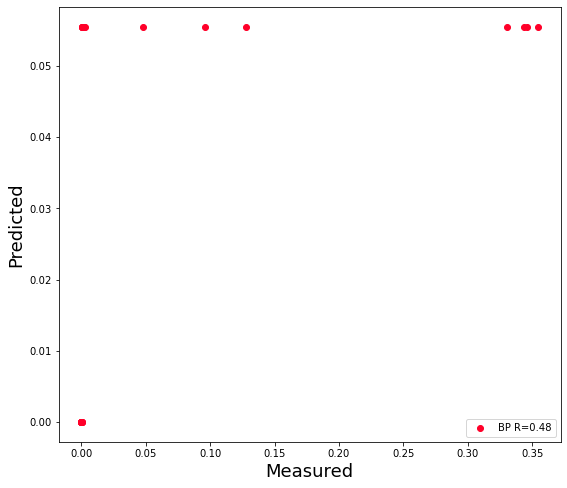

Median 0.47812052266532085


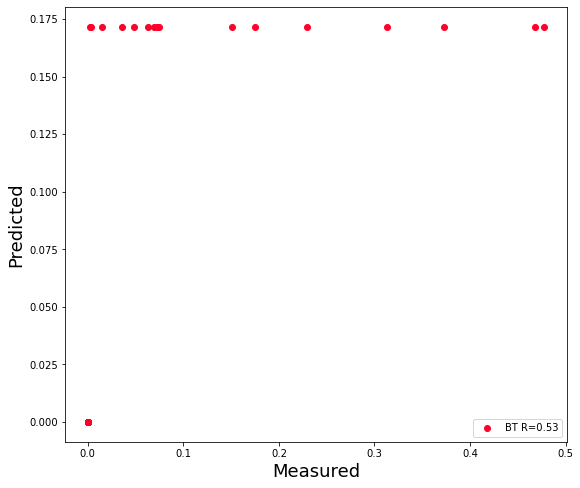

Median 0.5054451082241793


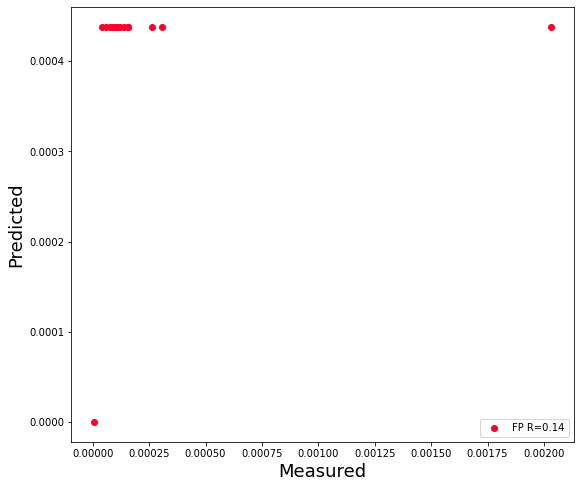

Median 0.47812052266532085


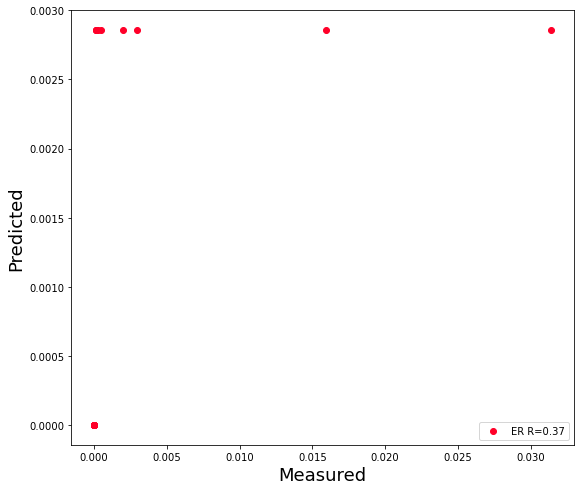

Median 0.42452246855091724


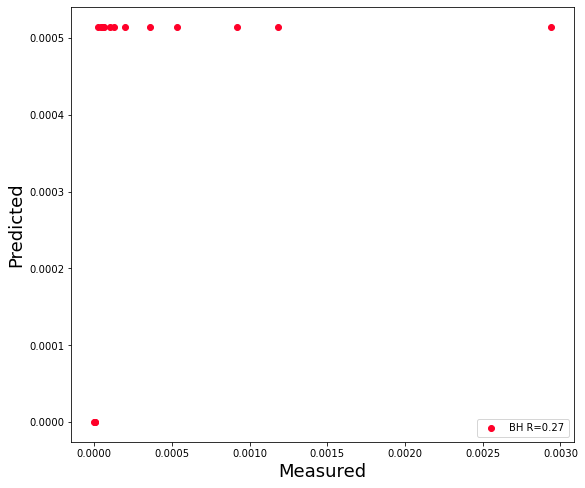

Median 0.3709244144365136


In [19]:
r_vals = []
for s in species:
    fig = plt.figure(figsize=(9,8))
    ax = fig.add_subplot(111)

    # set colors 
    cm = plt.get_cmap('gist_rainbow')
    ax.set_prop_cycle('color', [cm(1.*i/len(species)) for i in range(len(species))])
    
    y_inds = np.in1d(all_species_names, s)
    y_s_true = np.array(y_true)[y_inds]
    y_s_pred = np.array(y_pred)[y_inds]
    
    z_inds = y_s_true > 0
    y_s_true = y_s_true[z_inds]
    y_s_pred = y_s_pred[z_inds]
    
    r = linregress(y_s_true, y_s_pred).rvalue
    r_vals.append(r)
    ax.scatter(y_s_true, y_s_pred, label=s.replace("abs","")+" R={:.2f}".format(r))
    
    # set legend and labels
    ax.legend()
    ax.set_xlabel("Measured", fontsize=18)
    ax.set_ylabel("Predicted", fontsize=18)

    #plt.savefig("Results/node_fit_mf.pdf", dpi=200)
    plt.show()
    print("Median", np.median(r_vals))